<a href="https://colab.research.google.com/github/EdilTurdum/Machine-Learning-Course/blob/master/K_Means_Clustering_Algorithm_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from random import randrange as rand
import math

#Get the data

In [22]:
datapoints = [
              [1,0],
              [2,1],
              [2,2],
              [3,3],
              [7,8],
              [9,10],
              [7,6],
              [5,7]]
K = 2 #number of clusters
ds = pd.DataFrame(data=datapoints, columns=['X','Y'])


#Identify the limits for each column
This is necessary to generate the first random values for the cluster centroids

In [23]:
limits = pd.DataFrame(columns=['Min','Max', 'Column'])
data=[]
for col in ds:
  data.append([ds[col].min(), ds[col].max(), col])
limits = limits.append(pd.DataFrame(data, columns=['Min','Max', 'Column']))
limits

,Min,Max,Column
0,1,9,X
1,0,10,Y


#Generate random centroids for K clusters

In [24]:
centroids = []
for k in range(K):
  centroids.append([k])
  for i in range(limits['Column'].count()):
    centroids[k].append(rand(limits['Min'].loc[i], limits['Max'].loc[i]))
cols=limits['Column'].tolist()
cols.insert(0,'Cluster ID')
clusters = pd.DataFrame(centroids, columns=cols)
print(clusters)

   Cluster ID  X  Y
0           0  8  8
1           1  8  6


# Assign data points to clusters

In [25]:
ds['Cluster']=1
for point in range(len(ds.index)):
  print('Current point: ' +  str(ds.iloc[point].values))
  ds['Cluster'].iloc[point] = clusters['Cluster ID'].iloc[0]
  for cent in range(len(clusters.index)):
    #print(str(cent)+ ' : ' + str(point))
    #print('Centroid dist: ' + str(math.sqrt(sum([(a - b) ** 2 for a, b in zip(ds.iloc[point,:-1], clusters.iloc[cent,1:])])))+ '   Cluster dist: '+ str(math.sqrt(sum([(a - b) ** 2 for a, b in zip(ds.iloc[point,:-1], clusters.iloc[0,1:])]))))
    if math.sqrt(sum([(a - b) ** 2 for a, b in zip(ds.iloc[point,:-1], clusters.iloc[cent,1:])])) < math.sqrt(sum([(a - b) ** 2 for a, b in zip(ds.iloc[point,:-1], clusters.iloc[0,1:])])):
      print('-->Changing cluster.')
      ds['Cluster'].iloc[point] = cent
ds

Current point: [1 0 1]
-->Changing cluster.
Current point: [2 1 1]
-->Changing cluster.
Current point: [2 2 1]
-->Changing cluster.
Current point: [3 3 1]
-->Changing cluster.
Current point: [7 8 1]
Current point: [ 9 10  1]
Current point: [7 6 1]
-->Changing cluster.
Current point: [5 7 1]


,X,Y,Cluster
0,1,0,1
1,2,1,1
2,2,2,1
3,3,3,1
4,7,8,0
5,9,10,0
6,7,6,1
7,5,7,0


#Plot the clusters of data points and the cluster centroids

In [26]:
limits[limits['Column'] == 'Y'].Min.item()

0

1


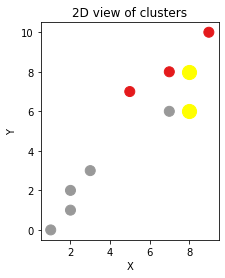

In [27]:
vmin = 0
vmax = ds['Cluster'].max()
print(vmax)
cmap = matplotlib.cm.Set1
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

plt.scatter(ds['X'], ds['Y'], c=ds['Cluster'], s=100, cmap= cmap)

plt.scatter(clusters['X'], clusters['Y'], c='yellow', s=200)
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(limits[limits.Column == 'Y'].Min.item()-0.5,limits[limits.Column == 'Y'].Max.item()+0.5)
plt.xlim(limits[limits.Column == 'X'].Min.item()-0.5,limits[limits.Column == 'X'].Max.item()+0.5)
plt.title('2D view of clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()